<a href="https://colab.research.google.com/github/NimraMushtaq/ml-projects/blob/master/Restaurant_Review_Sentiment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('/content/Restaurant_Reviews.tsv',sep='\t')

In [7]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [8]:
data.shape

(1000, 2)

In [11]:
data.isnull().sum()

,0
Review,0
Liked,0


In [12]:
# Balanced dataset
data['Liked'].value_counts()

,count
Liked,
1,500
0,500


In [14]:
data['char_count'] = data['Review'].apply(len)

In [15]:
data.head()

,Review,Liked,char_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [17]:
data['word_count'] = data['Review'].apply(lambda x : len(str(x).split()))
data.head()

,Review,Liked,char_count,word_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [25]:
# Natural Language Toolkit for tokenization
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [26]:
data['sent_count'] = data['Review'].apply(lambda x: len(nltk.sent_tokenize(str(x))))
data.head()

,Review,Liked,char_count,word_count,sent_count
0,Wow... Loved this place.,1,24,4,2
1,Crust is not good.,0,18,4,1
2,Not tasty and the texture was just nasty.,0,41,8,1
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1


In [27]:
data[data['Liked']==1]['char_count'].mean()

np.float64(55.88)

In [28]:
data[data['Liked']==0]['char_count'].mean()

np.float64(60.75)

In [31]:
import re
data['Review'][0]

'Wow... Loved this place.'

In [48]:
# replace special char with space
review = re.sub('[^a-zA-Z]',' ',data['Review'][0])
review

'Wow    Loved this place '

In [49]:
review = review.lower().split()
review

['wow', 'loved', 'this', 'place']

In [50]:
# remove stopwords from review
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [52]:
review = [word for word in review if word not in set(all_stopwords)]
review

['wow', 'loved', 'place']

In [53]:
# Stemming: reduce words to a base form to group similar words
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [54]:
review = [ps.stem(word) for word in review]
review

['wow', 'love', 'place']

In [55]:
import re
custom_stopwords = {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                    'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                    'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
                    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}

corpus =[]
ps =PorterStemmer()
stop_words = set(stopwords.words("english")) - custom_stopwords

for i in range(len(data)):
    review = re.sub('[^a-zA-Z]',' ',data['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = " ".join(review)
    corpus.append(review)

In [57]:
data['processed_text'] = corpus
data.head()

,Review,Liked,char_count,word_count,sent_count,processed_text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


In [58]:
# word cloud pictorial representation of the most frequent keyword in dataset
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=8, background_color='white')
pos = wc.generate(data[data['Liked']==1]['processed_text'].str.cat(sep=" "))


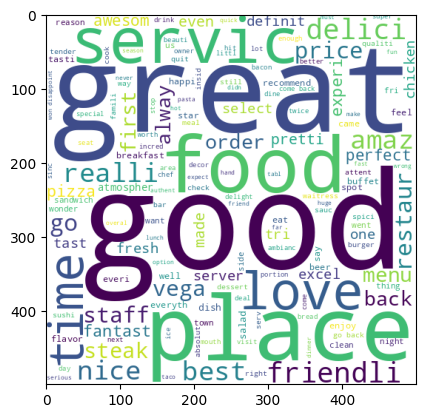

In [59]:
# font size is directly proportional to the frequency of the word
plt.imshow(pos)

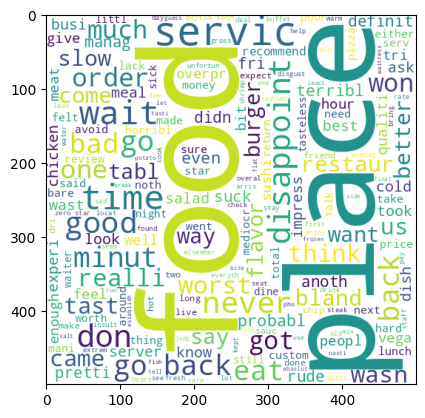

In [60]:
# font size is directly proportional to the frequency of the word
negative = wc.generate(data[data['Liked']==0]['processed_text'].str.cat(sep=" "))
plt.imshow(negative)

In [62]:
# convert review to vectors using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
# 1500 most common words in our corpus
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [63]:
# 1000 review 1500 common words
X.shape

(1000, 1500)

In [65]:
# target column
y = data['Liked']

In [80]:
# Training model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [81]:
# First Model
from sklearn.naive_bayes import GaussianNB
nb =GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test,y_pred)

0.68

In [82]:
# Second Model
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.795

In [83]:
# Third Model
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.82

In [85]:
# Save best model
import joblib
joblib.dump(rf,'Restaurant_review_model')

['Restaurant_review_model']